In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
import os

In [7]:
data = pd.read_csv('onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [8]:
data.drop(columns='Unnamed: 12', inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


([<matplotlib.patches.Wedge at 0x26145c671c0>,
 [Text(0.24725331909968304, 1.07185157377045, 'Male'),
  Text(-0.24725331909968293, -1.0718515737704502, 'Female')],
 [Text(0.13486544678164528, 0.5846463129656999, '42.8%'),
  Text(-0.13486544678164522, -0.5846463129657, '57.2%')])

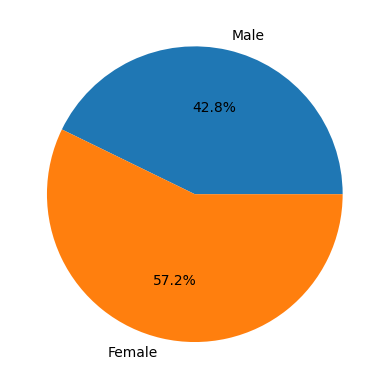

In [14]:
by_gender = data.groupby('Gender').size()
plt.pie(by_gender, labels=['Male', 'Female'], autopct='%1.1f%%')

<Axes: xlabel='Monthly Income', ylabel='count'>

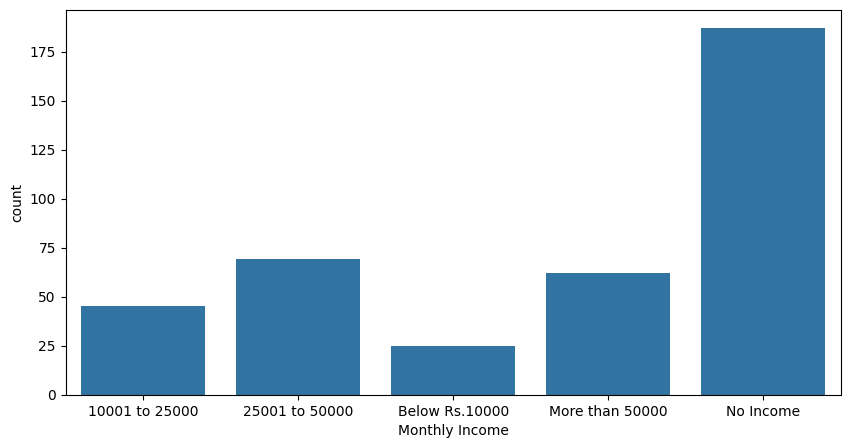

In [23]:
import seaborn as sns
plt.figure(figsize=(10,5))
age_count = data.groupby('Monthly Income').size().reset_index(name='count')
sns.barplot(x='Monthly Income', y='count', data=age_count)

In [26]:
data.groupby('Monthly Income')['Age'].mean()

Monthly Income
10001 to 25000     24.800000
25001 to 50000     26.434783
Below Rs.10000     23.880000
More than 50000    27.290323
No Income          23.139037
Name: Age, dtype: float64